In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

In [3]:
better_life = pd.read_csv('./Data/better_life.csv', sep =',')
better_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2369 non-null   int64  
 1   LOCATION        2369 non-null   object 
 2   Country         2369 non-null   object 
 3   INDICATOR       2369 non-null   object 
 4   Indicator       2369 non-null   object 
 5   MEASURE         2369 non-null   object 
 6   Measure         2369 non-null   object 
 7   INEQUALITY      2369 non-null   object 
 8   Inequality      2369 non-null   object 
 9   Unit Code       2369 non-null   object 
 10  Unit            2369 non-null   object 
 11  PowerCode Code  2369 non-null   int64  
 12  PowerCode       2369 non-null   object 
 13  Value           2369 non-null   float64
dtypes: float64(1), int64(2), object(11)
memory usage: 259.2+ KB


In [32]:
better_life.head()

,Unnamed: 0,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Value
0,0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,3.1
1,1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,2.3
2,2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,2.4
3,3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,3.8
4,4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,2.3


In [4]:
better_life['Indicator'].unique()

array(['Labour market insecurity',
       'Stakeholder engagement for developing regulations',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Feeling safe walking alone at night', 'Rooms per person',
       'Household net adjusted disposable income', 'Household net wealth',
       'Employment rate', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network',
       'Educational attainment', 'Student skills', 'Years in education',
       'Air pollution', 'Water quality', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Homicide rate', 'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [4]:
better_life['INDICATOR'].unique()

array(['JE_LMIS', 'CG_SENG', 'HO_BASE', 'HO_HISH', 'PS_FSAFEN', 'HO_NUMR',
       'IW_HADI', 'IW_HNFW', 'JE_EMPL', 'JE_LTUR', 'JE_PEARN', 'SC_SNTWS',
       'ES_EDUA', 'ES_STCS', 'ES_EDUEX', 'EQ_AIRP', 'EQ_WATER', 'CG_VOTO',
       'HS_LEB', 'HS_SFRH', 'SW_LIFS', 'PS_REPH', 'WL_EWLH', 'WL_TNOW'],
      dtype=object)

In [5]:
better_life['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Türkiye',
       'United Kingdom', 'United States', 'Chile', 'Estonia', 'Israel',
       'Latvia', 'Slovenia', 'OECD - Total', 'Switzerland', 'Brazil',
       'Russia', 'South Africa', 'Colombia', 'Lithuania', 'Costa Rica'],
      dtype=object)

In [6]:
better_life = better_life[better_life['Country'] != 'OECD - Total']

In [7]:
better_life.groupby('Indicator')['Country'].count()

Indicator
Air pollution                                         41
Dwellings without basic facilities                    38
Educational attainment                               120
Employees working very long hours                    117
Employment rate                                      123
Feeling safe walking alone at night                  123
Homicide rate                                        123
Household net adjusted disposable income              35
Household net wealth                                  29
Housing expenditure                                   37
Labour market insecurity                              34
Life expectancy                                      123
Life satisfaction                                    203
Long-term unemployment rate                          117
Personal earnings                                     35
Quality of support network                           203
Rooms per person                                      38
Self-reported health 

## Ordeno paises por el valor en 'life satisfaction' y represento los primeros y los ultimos

In [8]:
life_satisfaction=better_life.loc[(better_life['Indicator']=='Life satisfaction') & (better_life['INEQUALITY']=='TOT')].sort_values(by='Value',ascending=False)
graph1 = life_satisfaction[['Country','Value']]


In [9]:
len(graph1)

41

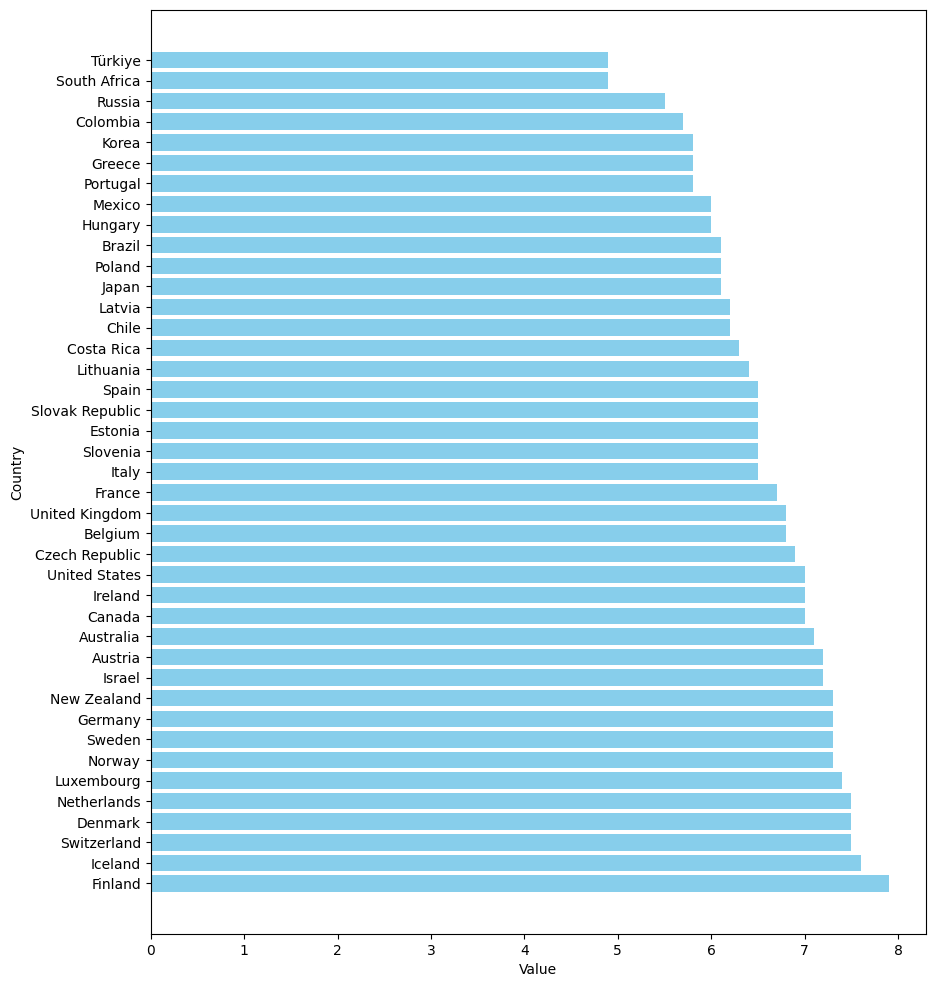

In [10]:
countries = life_satisfaction['Country']
values = life_satisfaction['Value']

plt.figure(figsize=(10, 12))
plt.barh(countries, values, color='skyblue')

#plt.title("Life satisfaction")
plt.xlabel("Value")
plt.ylabel("Country")

# Show the plot
plt.show()

## Life satisfaction

In [11]:
subset_data = graph1[32:42]

trace1 = go.Bar(
    x=subset_data['Country'],
    y=subset_data['Value'],
    marker=dict(
        color='rgb(55, 83, 109)'  
    )
)

data = [trace1]
layout = go.Layout(
    xaxis=dict(title='Countries', tickangle=30),
    yaxis=dict(range=[0,10]),
    autosize=False,  
    width=500,  
    height=350, 
    margin=go.layout.Margin(
        l=50, 
        r=20, 
        b=50, 
        t=50  
    )
)

fig = go.Figure(data=data, layout=layout)

fig.show()


## Voy a ver ahora otros indicadores del indice 'better life'

## 'Student Skills'

In [12]:
student_skills=better_life.loc[(better_life['Indicator']=='Student skills') & (better_life['INEQUALITY']=='TOT')].sort_values(by='Value',ascending=False)
graph2 = student_skills[['Country','Value']]

In [13]:
len(graph2)

39

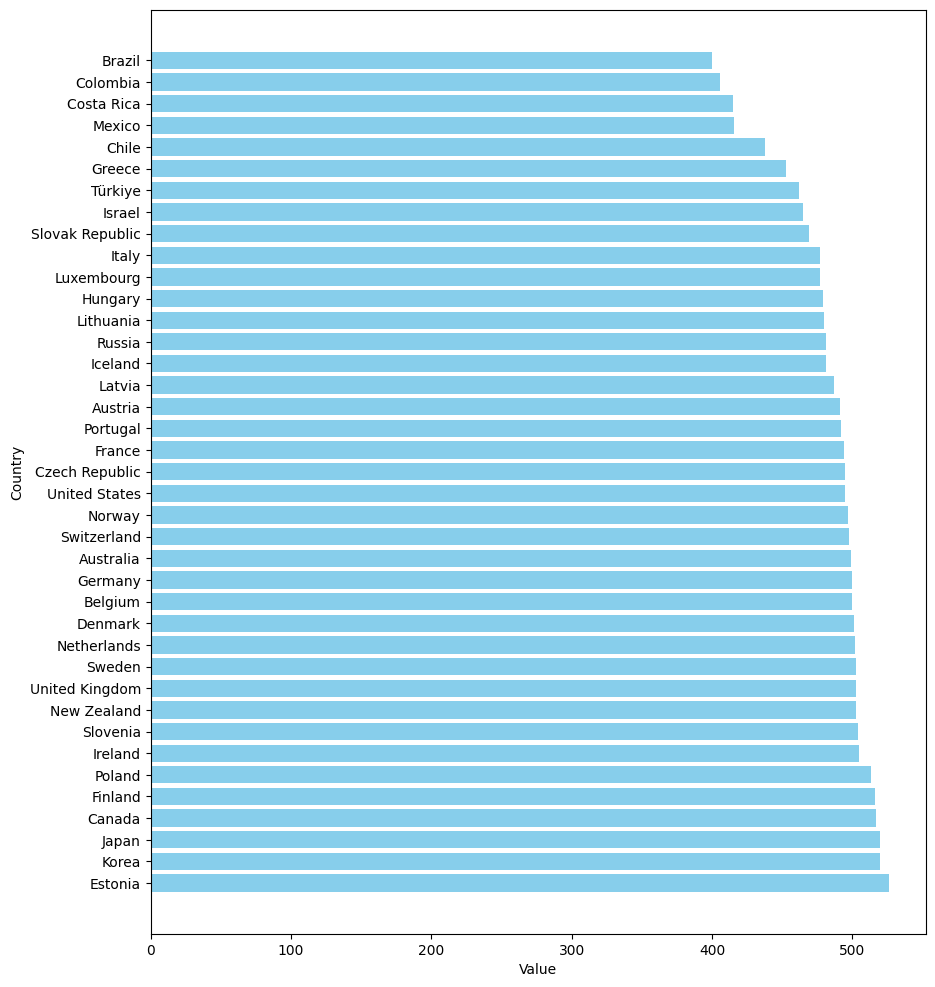

In [14]:
countries = student_skills['Country']
values = student_skills['Value']

plt.figure(figsize=(10, 12))
plt.barh(countries, values, color='skyblue')

#plt.title("Student skills")
plt.xlabel("Value")
plt.ylabel("Country")

# Show the plot
plt.show()

In [15]:
subset_data = graph2[32:42]

trace1 = go.Bar(
    x=subset_data['Country'],
    y=subset_data['Value'],
    marker=dict(
        color='rgb(55, 83, 109)'  
    )
)

data = [trace1]
layout = go.Layout(
    xaxis=dict(title='Countries', tickangle=30),
    yaxis=dict(range=[0,10]),
    autosize=False,  
    width=500,  
    height=350, 
    margin=go.layout.Margin(
        l=50, 
        r=20, 
        b=50, 
        t=50  
    )
)

fig = go.Figure(data=data, layout=layout)

fig.show()


## 'Homicide rate'

In [16]:
homicide=better_life.loc[(better_life['Indicator']=='Homicide rate') & (better_life['INEQUALITY']=='TOT')].sort_values(by='Value',ascending=False)
graph3 = homicide[['Country','Value']]
len(graph3)

41

In [17]:
subset_data = graph3[32:42]

trace1 = go.Bar(
    x=subset_data['Country'],
    y=subset_data['Value'],
    marker=dict(
        color='rgb(55, 83, 109)'  
    )
)

data = [trace1]
layout = go.Layout(
    xaxis=dict(title='Countries', tickangle=30),
    yaxis=dict(range=[0,10]),
    autosize=False,  
    width=500,  
    height=350, 
    margin=go.layout.Margin(
        l=50, 
        r=20, 
        b=50, 
        t=50  
    )
)

fig = go.Figure(data=data, layout=layout)

fig.show()

## Busco cual es el indicador mas valorado para cada pais

In [18]:

result = better_life.groupby('Country')['Value'].max().reset_index()

max_values_indices = better_life.groupby('Country')['Value'].idxmax()
max_indicators = better_life.loc[max_values_indices, ['Country', 'Indicator']]

result = result.merge(max_indicators, on='Country')

result.rename(columns={'Value': 'Maximo', 'Indicator': 'Indicator'}, inplace=True)
result.sort_values(by='Indicator')

,Country,Maximo,Indicator
34,South Africa,9338.0,Household net adjusted disposable income
31,Russia,19546.0,Household net adjusted disposable income
7,Costa Rica,16517.0,Household net adjusted disposable income
25,Mexico,16269.0,Household net adjusted disposable income
0,Australia,528768.0,Household net wealth
21,Korea,362340.0,Household net wealth
22,Latvia,79245.0,Household net wealth
23,Lithuania,182039.0,Household net wealth
24,Luxembourg,941162.0,Household net wealth
26,Netherlands,248599.0,Household net wealth


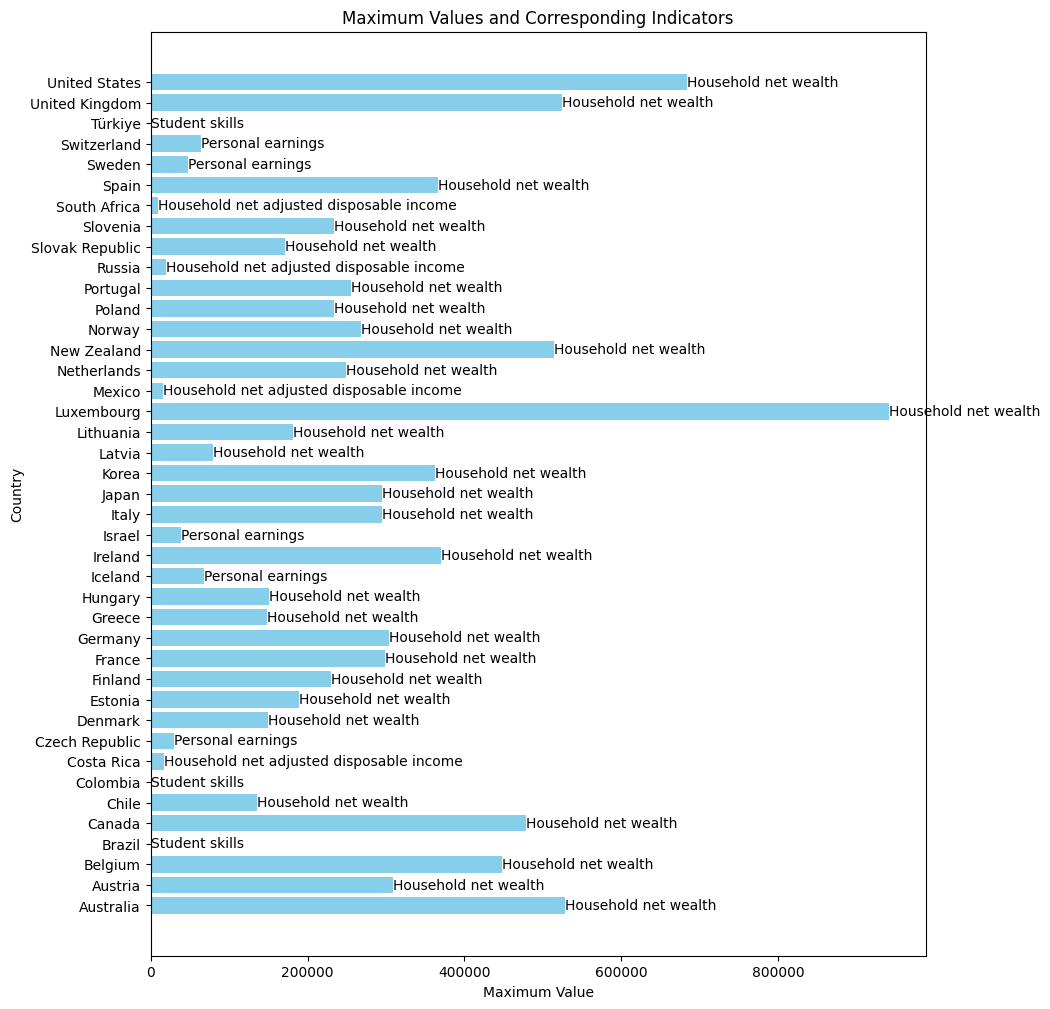

In [83]:
countries = result['Country']
max_values = result['Maximo']
indicators = result['Indicator']

# Create a horizontal bar chart
plt.figure(figsize=(10, 12))
plt.barh(countries, max_values, color='skyblue')

# Label the bars with indicators
for i in range(len(countries)):
    plt.text(max_values[i], i, indicators[i], ha='left', va='center')

# Set the title and axis labels
plt.title("Maximum Values and Corresponding Indicators")
plt.xlabel("Maximum Value")
plt.ylabel("Country")

# Show the plot
plt.show()

In [84]:
result.groupby('Indicator').count()

,Country,Maximo
Indicator,,
Household net adjusted disposable income,4,4
Household net wealth,29,29
Personal earnings,5,5
Student skills,3,3


## El mas valorado es 'Houshold net wealth'

In [85]:
netwealth=better_life.loc[(better_life['Indicator']=='Household net wealth') & (better_life['INEQUALITY']=='TOT')].sort_values(by='Value',ascending=False)
graph4 = netwealth[['Country','Value']]
len(graph4)

29

In [86]:
graph4

,Country,Value
345,Luxembourg,941162.0
354,United States,684500.0
331,Australia,528768.0
353,United Kingdom,524422.0
347,New Zealand,514162.0
334,Canada,478240.0
333,Belgium,447607.0
341,Ireland,370341.0
352,Spain,366534.0
344,Korea,362340.0


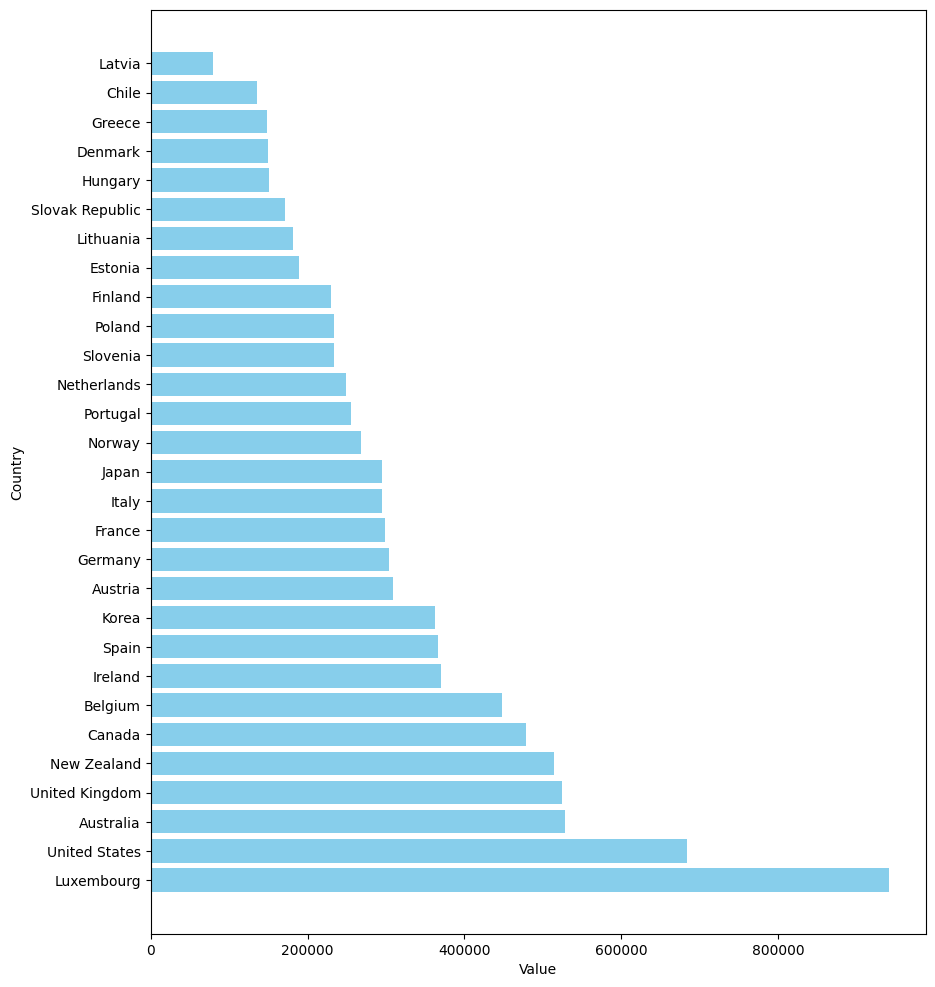

In [87]:
countries = netwealth['Country']
values = netwealth['Value']

plt.figure(figsize=(10, 12))
plt.barh(countries, values, color='skyblue')

#plt.title("Household net wealth")
plt.xlabel("Value")
plt.ylabel("Country")

# Show the plot
plt.show()

## Indicador menos valorado, salen 2 'Homicidi rate' y 'Dwellings without basic facilities'

In [88]:
resultmin = better_life.groupby('Country')['Value'].min().reset_index()

min_values_indices = better_life.groupby('Country')['Value'].idxmin()
min_indicators = better_life.loc[min_values_indices, ['Country', 'Indicator']]

resultmin = resultmin.merge(min_indicators, on='Country')

resultmin.rename(columns={'Value': 'Minimo', 'Indicator': 'Indicator'}, inplace=True)
resultmin.sort_values(by='Indicator')

,Country,Minimo,Indicator
40,United States,0.1,Dwellings without basic facilities
24,Luxembourg,0.1,Dwellings without basic facilities
26,Netherlands,0.1,Dwellings without basic facilities
28,Norway,0.0,Dwellings without basic facilities
16,Iceland,0.0,Dwellings without basic facilities
14,Greece,0.4,Dwellings without basic facilities
13,Germany,0.1,Dwellings without basic facilities
33,Slovenia,0.2,Dwellings without basic facilities
11,Finland,0.4,Dwellings without basic facilities
35,Spain,0.3,Dwellings without basic facilities


In [89]:
resultmin.groupby('Indicator').count()

,Country,Minimo
Indicator,,
Dwellings without basic facilities,15,15
Employees working very long hours,4,4
Homicide rate,15,15
Long-term unemployment rate,6,6
Stakeholder engagement for developing regulations,1,1


In [96]:
homicide=better_life.loc[(better_life['Indicator']=='Homicide rate') & (better_life['INEQUALITY']=='TOT')].sort_values(by='Value',ascending=False)
graph5 = netwealth[['Country','Value']]
len(graph5)

29

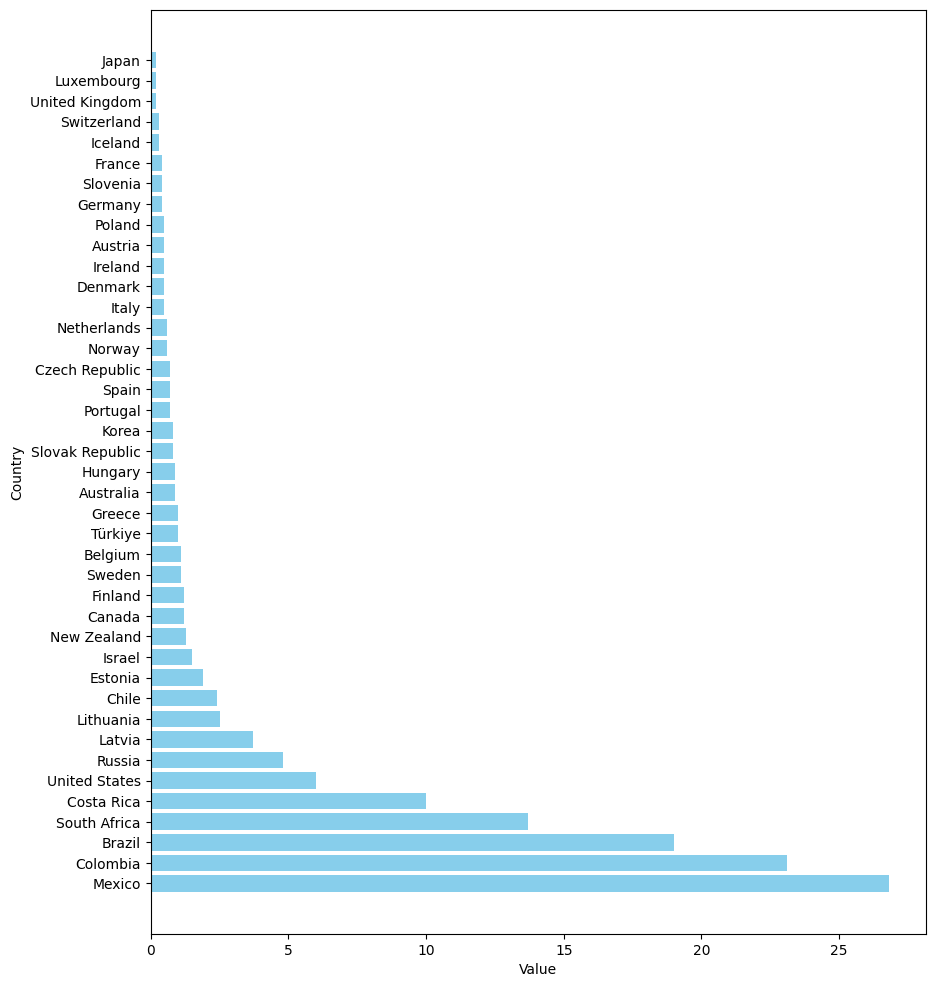

In [91]:
countries = homicide['Country']
values = homicide['Value']

plt.figure(figsize=(10, 12))
plt.barh(countries, values, color='skyblue')

#plt.title("Homicide rate")
plt.xlabel("Value")
plt.ylabel("Country")

# Show the plot
plt.show()

In [97]:
nofacilities=better_life.loc[(better_life['Indicator']=='Dwellings without basic facilities') & (better_life['INEQUALITY']=='TOT')].sort_values(by='Value',ascending=False)
graph6 = netwealth[['Country','Value']]
len(graph6)

29

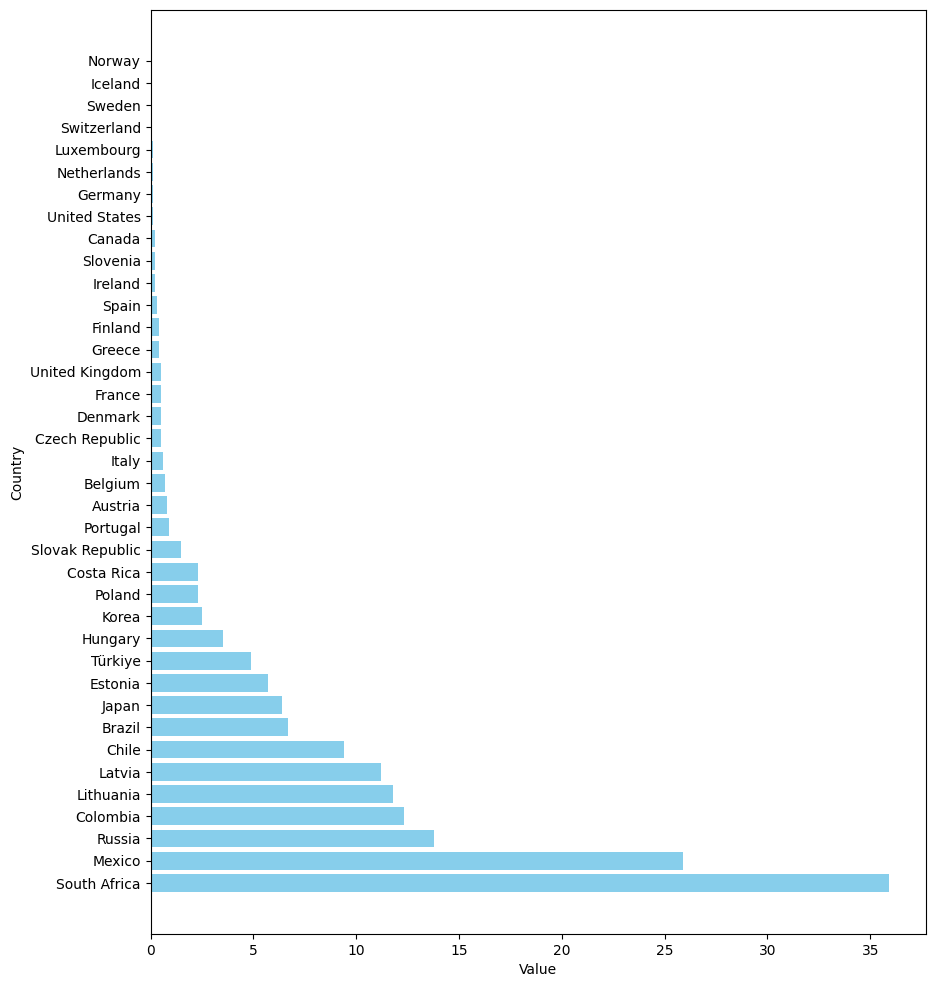

In [93]:
countries = nofacilities['Country']
values = nofacilities['Value']

plt.figure(figsize=(10, 12))
plt.barh(countries, values, color='skyblue')

#plt.title("Dwellings without basic facilities")
plt.xlabel("Value")
plt.ylabel("Country")

# Show the plot
plt.show()

In [94]:
better_life.groupby('Country')['Value'].max().reset_index()

,Country,Value
0,Australia,528768.0
1,Austria,309637.0
2,Belgium,447607.0
3,Brazil,470.0
4,Canada,478240.0
5,Chile,135787.0
6,Colombia,459.0
7,Costa Rica,16517.0
8,Czech Republic,29885.0
9,Denmark,149864.0


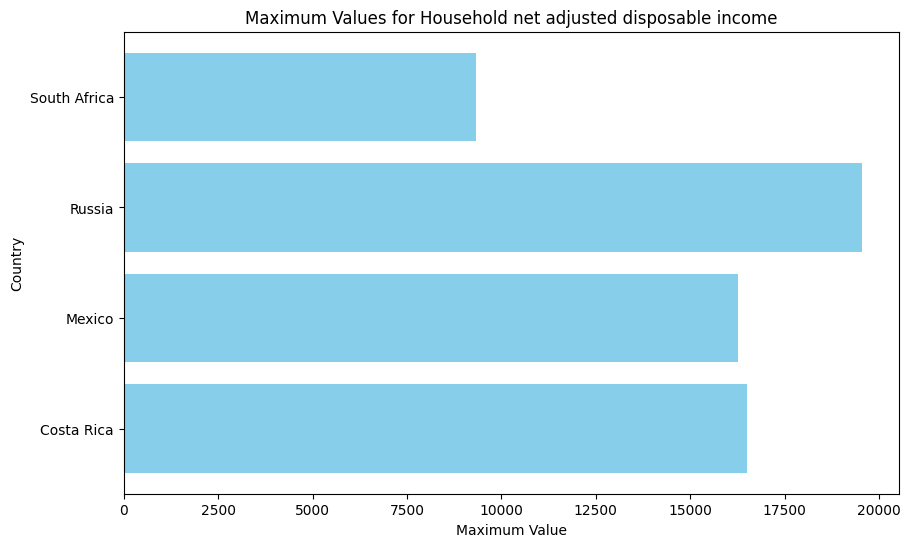

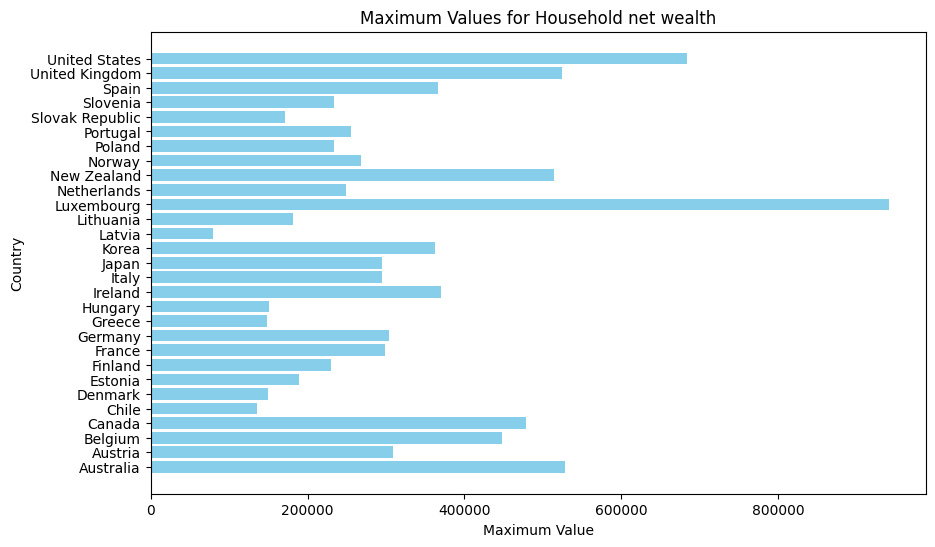

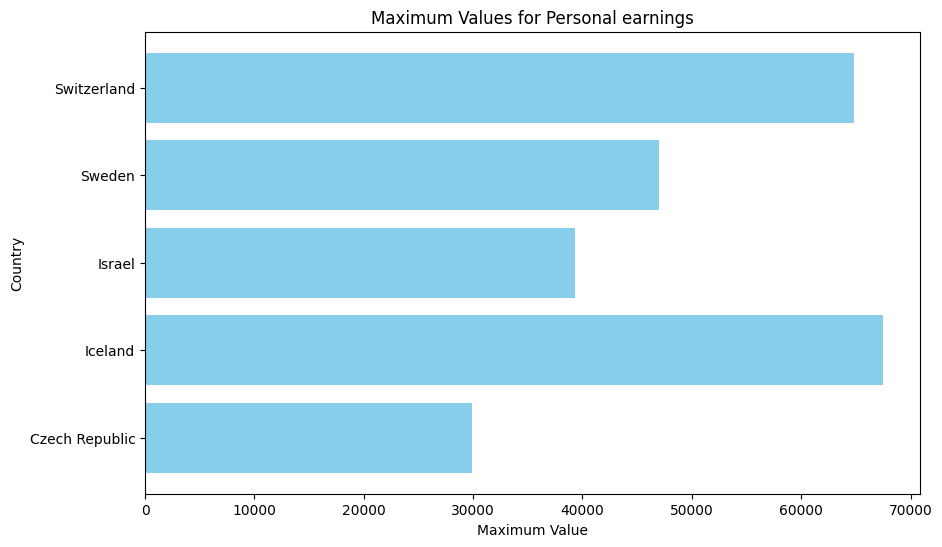

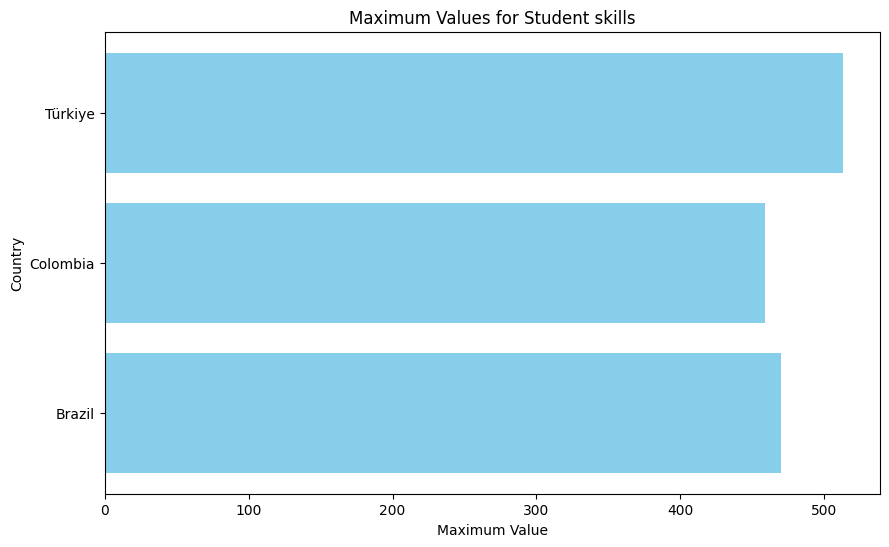

In [95]:
grouped = result.groupby('Indicator')


for indicator, group_data in grouped:
    plt.figure(figsize=(10, 6))
    plt.barh(group_data['Country'], group_data['Maximo'], color='skyblue')
    plt.title(f"Maximum Values for {indicator}")
    plt.xlabel("Maximum Value")
    plt.ylabel("Country")
    plt.xticks(rotation=0)
    plt.show()

## Me quedo solo con los indicadores representativos de una mejor calidad de vida y el de muchas horas de trabajo

In [8]:
values_to_exclude = ['Stakeholder engagement for developing regulations',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Feeling safe walking alone at night', 'Rooms per person',
       'Household net adjusted disposable income', 'Household net wealth',
       'Employment rate', 'Long-term unemployment rate','Quality of support network',
       'Educational attainment','Voter turnout','Self-reported health','Homicide rate']
better_life = better_life.drop(better_life[better_life['Indicator'].isin(values_to_exclude)].index)

In [9]:
condition = better_life['Country'] !='OECD - Total'
new_better_life = better_life[condition]

In [10]:
new_better_life['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Türkiye',
       'United Kingdom', 'United States', 'Chile', 'Estonia', 'Israel',
       'Latvia', 'Slovenia', 'Switzerland', 'Brazil', 'Russia',
       'South Africa', 'Lithuania', 'Colombia', 'Costa Rica'],
      dtype=object)

In [11]:
new_better_life.to_csv('./new_better_life.csv')


In [12]:
new_better_life['Indicator'].unique()

array(['Labour market insecurity', 'Personal earnings', 'Student skills',
       'Years in education', 'Air pollution', 'Water quality',
       'Life expectancy', 'Life satisfaction',
       'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [13]:
new_better_life.loc[:, ['Country', 'Indicator', 'Measure', 'Unit', 'Value']]

,Country,Indicator,Measure,Unit,Value
0,Australia,Labour market insecurity,Value,Percentage,3.1
1,Austria,Labour market insecurity,Value,Percentage,2.3
2,Belgium,Labour market insecurity,Value,Percentage,2.4
3,Canada,Labour market insecurity,Value,Percentage,3.8
4,Czech Republic,Labour market insecurity,Value,Percentage,2.3
...,...,...,...,...,...
2361,Costa Rica,Life satisfaction,Value,Average score,7.1
2362,Costa Rica,Life satisfaction,Value,Average score,6.5
2366,Costa Rica,Employees working very long hours,Value,Percentage,22.0
2367,Costa Rica,Employees working very long hours,Value,Percentage,27.9


In [16]:
new_better_life.loc[new_better_life['Country']=='Spain']

,Unnamed: 0,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Value
24,24,ESP,Spain,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,15.80
612,612,ESP,Spain,JE_PEARN,Personal earnings,L,Value,TOT,Total,USD,US Dollar,0,Units,37922.00
1139,1139,ESP,Spain,ES_EDUEX,Years in education,L,Value,TOT,Total,YR,Years,0,Units,18.00
1177,1177,ESP,Spain,ES_EDUEX,Years in education,L,Value,MN,Men,YR,Years,0,Units,18.00
1215,1215,ESP,Spain,ES_EDUEX,Years in education,L,Value,WMN,Women,YR,Years,0,Units,18.00
1253,1253,ESP,Spain,EQ_AIRP,Air pollution,L,Value,TOT,Total,MICRO_M3,Micrograms per cubic metre,0,Units,10.00
1292,1292,ESP,Spain,EQ_WATER,Water quality,L,Value,TOT,Total,PC,Percentage,0,Units,76.00
1331,1331,ESP,Spain,EQ_WATER,Water quality,L,Value,MN,Men,PC,Percentage,0,Units,75.00
1370,1370,ESP,Spain,EQ_WATER,Water quality,L,Value,WMN,Women,PC,Percentage,0,Units,77.00
1448,1448,ESP,Spain,HS_LEB,Life expectancy,L,Value,TOT,Total,YR,Years,0,Units,83.90


In [14]:
new_better_life.loc[new_better_life['Inequality']=='Total'].sort_values(by='Value', ascending = False)

,Unnamed: 0,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Value
616,616,USA,United States,JE_PEARN,Personal earnings,L,Value,TOT,Total,USD,US Dollar,0,Units,69392.0
599,599,ISL,Iceland,JE_PEARN,Personal earnings,L,Value,TOT,Total,USD,US Dollar,0,Units,67488.0
604,604,LUX,Luxembourg,JE_PEARN,Personal earnings,L,Value,TOT,Total,USD,US Dollar,0,Units,65854.0
614,614,CHE,Switzerland,JE_PEARN,Personal earnings,L,Value,TOT,Total,USD,US Dollar,0,Units,64824.0
606,606,NLD,Netherlands,JE_PEARN,Personal earnings,L,Value,TOT,Total,USD,US Dollar,0,Units,58828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,11,ISL,Iceland,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,1.0
2055,2055,SWE,Sweden,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,0.9
2056,2056,CHE,Switzerland,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,0.4
2048,2048,NLD,Netherlands,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,0.3


## Countries donde menos horas se trabaja y tienen mayores ingresos

In [15]:
best_countries = ['Denmark', 'France', 'Netherlands', 'Luxembourg', 'Austria', 'Finland', 'Iceland', 'Sweden', 'Germany', 'Norway']

In [16]:
data_best = new_better_life[new_better_life['Country'].isin(best_countries)]
print(data_best)


      Unnamed: 0 LOCATION      Country INDICATOR  \
1              1      AUT      Austria   JE_LMIS   
5              5      DNK      Denmark   JE_LMIS   
6              6      FIN      Finland   JE_LMIS   
7              7      FRA       France   JE_LMIS   
8              8      DEU      Germany   JE_LMIS   
...          ...      ...          ...       ...   
2193        2193      FIN      Finland   WL_TNOW   
2194        2194      FRA       France   WL_TNOW   
2195        2195      DEU      Germany   WL_TNOW   
2202        2202      NLD  Netherlands   WL_TNOW   
2204        2204      NOR       Norway   WL_TNOW   

                                      Indicator MEASURE Measure INEQUALITY  \
1                      Labour market insecurity       L   Value        TOT   
5                      Labour market insecurity       L   Value        TOT   
6                      Labour market insecurity       L   Value        TOT   
7                      Labour market insecurity       L   Value

In [17]:
data_best['Country'].unique()

array(['Austria', 'Denmark', 'Finland', 'France', 'Germany', 'Iceland',
       'Luxembourg', 'Netherlands', 'Norway', 'Sweden'], dtype=object)

In [18]:
data_best.loc[(data_best['Country']=='Germany') & (data_best['Indicator']=='Time devoted to leisure and personal care')]

,Unnamed: 0,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Value
2149,2149,DEU,Germany,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,Units,15.62
2172,2172,DEU,Germany,WL_TNOW,Time devoted to leisure and personal care,L,Value,MN,Men,HOUR,Hours,0,Units,15.70
2195,2195,DEU,Germany,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,Units,15.57


In [19]:
data_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 1 to 2204
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      267 non-null    int64  
 1   LOCATION        267 non-null    object 
 2   Country         267 non-null    object 
 3   INDICATOR       267 non-null    object 
 4   Indicator       267 non-null    object 
 5   MEASURE         267 non-null    object 
 6   Measure         267 non-null    object 
 7   INEQUALITY      267 non-null    object 
 8   Inequality      267 non-null    object 
 9   Unit Code       267 non-null    object 
 10  Unit            267 non-null    object 
 11  PowerCode Code  267 non-null    int64  
 12  PowerCode       267 non-null    object 
 13  Value           267 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 31.3+ KB


In [26]:
columns_to_delete = ['Unnamed: 0', 'LOCATION','INDICATOR','PowerCode Code','PowerCode']

In [21]:
columns_to_delete = ['MEASURE','Measure' ]

In [27]:
data_best=data_best.drop(columns=columns_to_delete)

In [28]:
data_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 1 to 2204
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     267 non-null    object 
 1   Indicator   267 non-null    object 
 2   INEQUALITY  267 non-null    object 
 3   Inequality  267 non-null    object 
 4   Unit Code   267 non-null    object 
 5   Unit        267 non-null    object 
 6   Value       267 non-null    float64
dtypes: float64(1), object(6)
memory usage: 16.7+ KB


In [29]:
data_best = data_best[data_best['INEQUALITY'] == 'TOT']


In [30]:
data_best['Indicator'].unique()

array(['Labour market insecurity', 'Personal earnings', 'Student skills',
       'Years in education', 'Air pollution', 'Water quality',
       'Life expectancy', 'Life satisfaction',
       'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [31]:
data_best

,Country,Indicator,INEQUALITY,Inequality,Unit Code,Unit,Value
1,Austria,Labour market insecurity,TOT,Total,PC,Percentage,2.30
5,Denmark,Labour market insecurity,TOT,Total,PC,Percentage,4.50
6,Finland,Labour market insecurity,TOT,Total,PC,Percentage,2.20
7,France,Labour market insecurity,TOT,Total,PC,Percentage,3.10
8,Germany,Labour market insecurity,TOT,Total,PC,Percentage,1.40
...,...,...,...,...,...,...,...
2147,Finland,Time devoted to leisure and personal care,TOT,Total,HOUR,Hours,15.17
2148,France,Time devoted to leisure and personal care,TOT,Total,HOUR,Hours,16.20
2149,Germany,Time devoted to leisure and personal care,TOT,Total,HOUR,Hours,15.62
2156,Netherlands,Time devoted to leisure and personal care,TOT,Total,HOUR,Hours,15.45


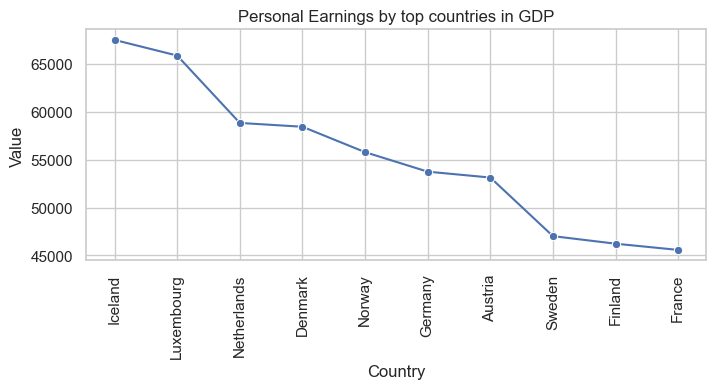

In [104]:
earnings_data = data_best[data_best['Indicator'] == 'Personal earnings']

earnings_data = earnings_data.sort_values(by='Value', ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 3))
sns.lineplot(x="Country", y="Value", data=earnings_data, marker="o") 
plt.xticks(rotation=90) 
plt.title("Personal Earnings by top countries in GDP") 

plt.show()

## Countries donde mas horas se trabaja y tienen menores ingresos

In [105]:
worst_countries = ['Chile', 'Colombia', 'Costa Rica', 'Greece', 'Mexico']

In [106]:
data_worst = new_better_life[new_better_life['Country'].isin(worst_countries)]
print(data_worst)

      Unnamed: 0 LOCATION     Country INDICATOR  \
9              9      GRC      Greece   JE_LMIS   
17            17      MEX      Mexico   JE_LMIS   
29            29      CHL       Chile   JE_LMIS   
597          597      GRC      Greece  JE_PEARN   
605          605      MEX      Mexico  JE_PEARN   
...          ...      ...         ...       ...   
2361        2361      CRI  Costa Rica   SW_LIFS   
2362        2362      CRI  Costa Rica   SW_LIFS   
2366        2366      CRI  Costa Rica   WL_EWLH   
2367        2367      CRI  Costa Rica   WL_EWLH   
2368        2368      CRI  Costa Rica   WL_EWLH   

                              Indicator MEASURE Measure INEQUALITY Inequality  \
9              Labour market insecurity       L   Value        TOT      Total   
17             Labour market insecurity       L   Value        TOT      Total   
29             Labour market insecurity       L   Value        TOT      Total   
597                   Personal earnings       L   Value        

In [107]:
columns_to_delete = ['Unnamed: 0', 'LOCATION','INDICATOR','PowerCode Code','PowerCode','MEASURE','Measure' ]

In [108]:
data_worst=data_worst.drop(columns=columns_to_delete)

In [109]:
data_worst = data_worst[data_worst['INEQUALITY'] == 'TOT']

In [110]:
data_worst

,Country,Indicator,INEQUALITY,Inequality,Unit Code,Unit,Value
9,Greece,Labour market insecurity,TOT,Total,PC,Percentage,21.70
17,Mexico,Labour market insecurity,TOT,Total,PC,Percentage,4.00
29,Chile,Labour market insecurity,TOT,Total,PC,Percentage,7.00
597,Greece,Personal earnings,TOT,Total,USD,US Dollar,27207.00
605,Mexico,Personal earnings,TOT,Total,USD,US Dollar,16230.00
617,Chile,Personal earnings,TOT,Total,USD,US Dollar,26729.00
939,Greece,Student skills,TOT,Total,AVSCORE,Average score,453.00
947,Mexico,Student skills,TOT,Total,AVSCORE,Average score,416.00
960,Chile,Student skills,TOT,Total,AVSCORE,Average score,438.00
1124,Greece,Years in education,TOT,Total,YR,Years,19.00


In [111]:
data_worst['Indicator'].unique()

array(['Labour market insecurity', 'Personal earnings', 'Student skills',
       'Years in education', 'Air pollution', 'Water quality',
       'Life expectancy', 'Life satisfaction',
       'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

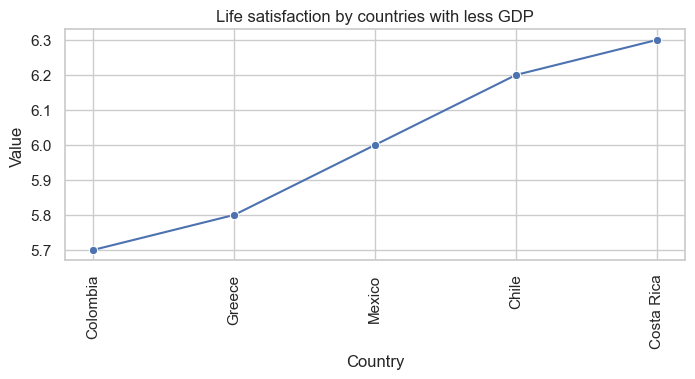

In [112]:
earnings_data2 = data_worst[data_worst['Indicator'] == 'Life satisfaction']

earnings_data2 = earnings_data2.sort_values(by='Value', ascending=True)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 3))
sns.lineplot(x="Country", y="Value", data=earnings_data2, marker="o") 
plt.xticks(rotation=90) 
plt.title("Life satisfaction by countries with less GDP") 

# Show the plot
plt.show()

In [65]:
data_best

,Country,Indicator,INEQUALITY,Inequality,Unit Code,Unit,Value
1,Austria,Labour market insecurity,TOT,Total,PC,Percentage,2.30
5,Denmark,Labour market insecurity,TOT,Total,PC,Percentage,4.50
6,Finland,Labour market insecurity,TOT,Total,PC,Percentage,2.20
7,France,Labour market insecurity,TOT,Total,PC,Percentage,3.10
8,Germany,Labour market insecurity,TOT,Total,PC,Percentage,1.40
...,...,...,...,...,...,...,...
2147,Finland,Time devoted to leisure and personal care,TOT,Total,HOUR,Hours,15.17
2148,France,Time devoted to leisure and personal care,TOT,Total,HOUR,Hours,16.20
2149,Germany,Time devoted to leisure and personal care,TOT,Total,HOUR,Hours,15.62
2156,Netherlands,Time devoted to leisure and personal care,TOT,Total,HOUR,Hours,15.45


In [66]:
life_satisfaction_data = data_best[data_best['Indicator'] == 'Life satisfaction']

# Sort the data in ascending order by 'Value' (Life satisfaction)
life_satisfaction_data = life_satisfaction_data.sort_values(by='Value', ascending=True)

# Select only the first 5 countries
top_5_life_satisfaction = life_satisfaction_data.head(5)

# Display the selected data
print(top_5_life_satisfaction[['Country', 'Value']])

      Country  Value
1729   France    6.7
1723  Austria    7.2
1730  Germany    7.3
1742   Norway    7.3
1747   Sweden    7.3


In [67]:
top_5_life_satisfaction

,Country,Indicator,INEQUALITY,Inequality,Unit Code,Unit,Value
1729,France,Life satisfaction,TOT,Total,AVSCORE,Average score,6.7
1723,Austria,Life satisfaction,TOT,Total,AVSCORE,Average score,7.2
1730,Germany,Life satisfaction,TOT,Total,AVSCORE,Average score,7.3
1742,Norway,Life satisfaction,TOT,Total,AVSCORE,Average score,7.3
1747,Sweden,Life satisfaction,TOT,Total,AVSCORE,Average score,7.3


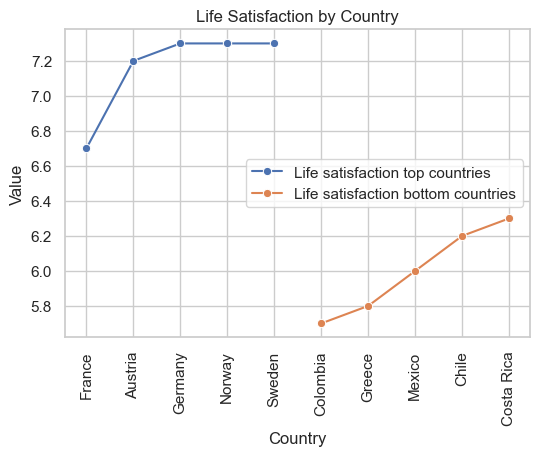

In [114]:

satisfaction1 =top_5_life_satisfaction[top_5_life_satisfaction['Indicator'] == 'Life satisfaction']
satisfaction2 = data_worst[data_worst['Indicator'] == 'Life satisfaction']

satisfaction1 = satisfaction1.sort_values(by='Value', ascending=True)
satisfaction2 = satisfaction2.sort_values(by='Value', ascending=True)

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))  

sns.lineplot(x="Country", y="Value", data=satisfaction1, marker="o", label="Life satisfaction top countries")

sns.lineplot(x="Country", y="Value", data=satisfaction2, marker="o", label="Life satisfaction bottom countries")

plt.xticks(rotation=90) 
plt.title("Life Satisfaction by Country") 
plt.legend() 

plt.show()

In [74]:
data_worst.loc[data_worst['Indicator']=='Life expectancy']

,Country,Indicator,INEQUALITY,Inequality,Unit Code,Unit,Value
1433,Greece,Life expectancy,TOT,Total,YR,Years,81.7
1441,Mexico,Life expectancy,TOT,Total,YR,Years,75.1
1455,Chile,Life expectancy,TOT,Total,YR,Years,80.6
2282,Colombia,Life expectancy,TOT,Total,YR,Years,76.7
2352,Costa Rica,Life expectancy,TOT,Total,YR,Years,80.5


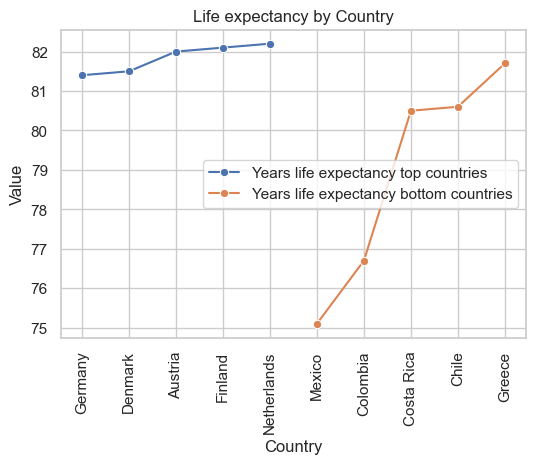

In [115]:
life_expectancy = data_best[data_best['Indicator'] == 'Life expectancy']

life_expectancy = life_expectancy.sort_values(by='Value', ascending=True)

top_5_expectancy = life_expectancy.head(5)

expectancy1 =top_5_expectancy[top_5_expectancy['Indicator'] == 'Life expectancy']
expectancy2 = data_worst[data_worst['Indicator'] == 'Life expectancy']

expectancy1 = expectancy1.sort_values(by='Value', ascending=True)
expectancy2 = expectancy2.sort_values(by='Value', ascending=True)

sns.set(style="whitegrid")

plt.figure(figsize=(6,4)) 

sns.lineplot(x="Country", y="Value", data=expectancy1, marker="o", label="Years life expectancy top countries")

sns.lineplot(x="Country", y="Value", data=expectancy2, marker="o", label="Years life expectancy bottom countries")

plt.xticks(rotation=90)  
plt.title("Life expectancy by Country")  
plt.legend() 

plt.show()

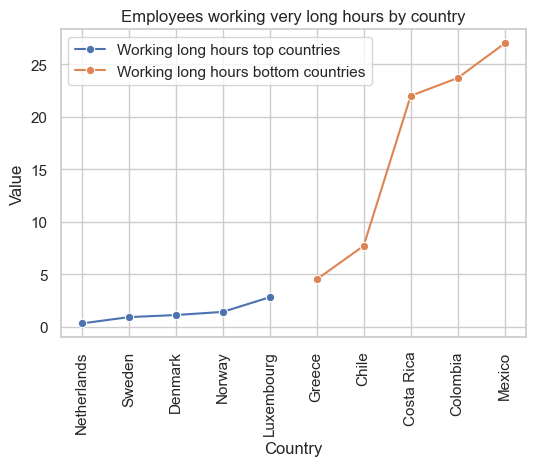

In [116]:
working = data_best[data_best['Indicator'] == 'Employees working very long hours']

working = working.sort_values(by='Value', ascending=True)

top_5_working = working.head(5)
working1 =top_5_working[top_5_working['Indicator'] == 'Employees working very long hours']
working2 = data_worst[data_worst['Indicator'] == 'Employees working very long hours']

working1 = working1.sort_values(by='Value', ascending=True)
working2 = working2.sort_values(by='Value', ascending=True)

sns.set(style="whitegrid")

plt.figure(figsize=(6,4)) 

sns.lineplot(x="Country", y="Value", data=working1, marker="o", label="Working long hours top countries")

sns.lineplot(x="Country", y="Value", data=working2, marker="o", label="Working long hours bottom countries")

plt.xticks(rotation=90)  
plt.title("Employees working very long hours by country")  
plt.legend() 

plt.show()